<a href="https://colab.research.google.com/github/KxxHyoRim/Data-Mining/blob/main/AirRoute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/Data Mining/항공통계.csv'
#pandas read_csv로 불러오기
data = pd.read_csv(filename, encoding='cp949') # encoding : 한글 로딩 위함
data.head()

,항공노선,LEVEL1,값,년(Annual),증감,증감율,구성비,누계,누계구성비
0,김포-김해,계,273,2020,273,273,0,0,0
1,김포-김해,대한항공,63,2020,63,63,0,0,0
2,김포-김해,아시아나항공,0,2020,0,0,0,0,0
3,김포-김해,제주항공,43,2020,43,43,0,0,0
4,김포-김해,진에어,56,2020,56,56,0,0,0


In [29]:
air_route = data['항공노선']

inland = 0
jeju = 0

idx = 0
for i in air_route:
  if i.find('제주') == -1:
    inland += data['값'][idx]
  else :
    jeju += data['값'][idx]
  idx += 1

print(inland, jeju)

route_data = [inland, jeju]

6118 6368


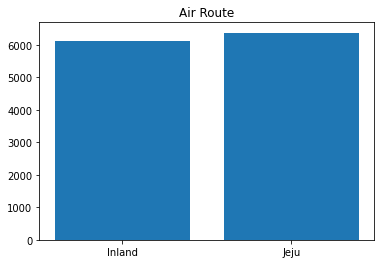

In [32]:
label = ['Inland', 'Jeju']
x = np.arange(2)

plt.bar(x, route_data)
plt.xticks(x, label)
plt.title('Air Route')

plt.show()